##### Aprendizaje para determinar Cuerpos Celestes

#### Ocupado el Notebook DecisionTreeClassifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

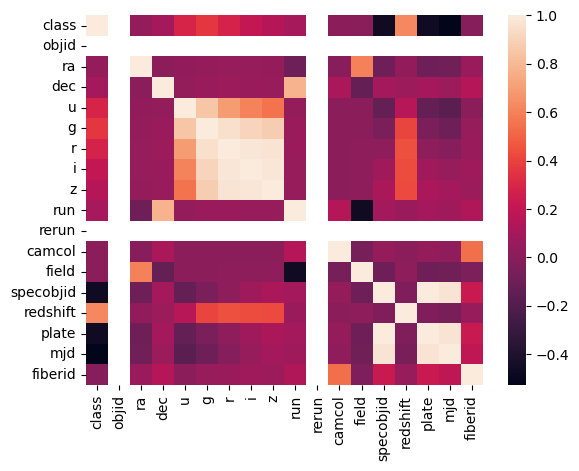

In [5]:
#código solamente para efecto práctico de mapa de calor
df2_test = df2[['class']]
df2_cp = df2
for n in range(df2_test.shape[0]):
    if df2_test.iloc[n,0] =='STAR':
        df2_test.iloc[n,0] = 1
    elif df2_test.iloc[n,0] =='GALAXY':
        df2_test.iloc[n,0] = 2
    elif df2_test.iloc[n,0] =='QSO':
        df2_test.iloc[n,0] = 3
df2_test.head()

df2_cut = df2_cp.drop(['class'],axis=1)
df2_plot = pd.concat([df2_test,df2_cut],axis=1)
#Print
sb.heatmap(df2_plot.corr())

#Restauro data
df2_data = df2

Se logra visualizar que "rerun" presenta una relación muy alta de dependencia con las demás variables, y ésto podría presentar problemas en el proceso de aprendizaje

In [6]:
df2_data = df2_data.drop(['rerun'],axis=1)

<Axes: xlabel='class', ylabel='u'>

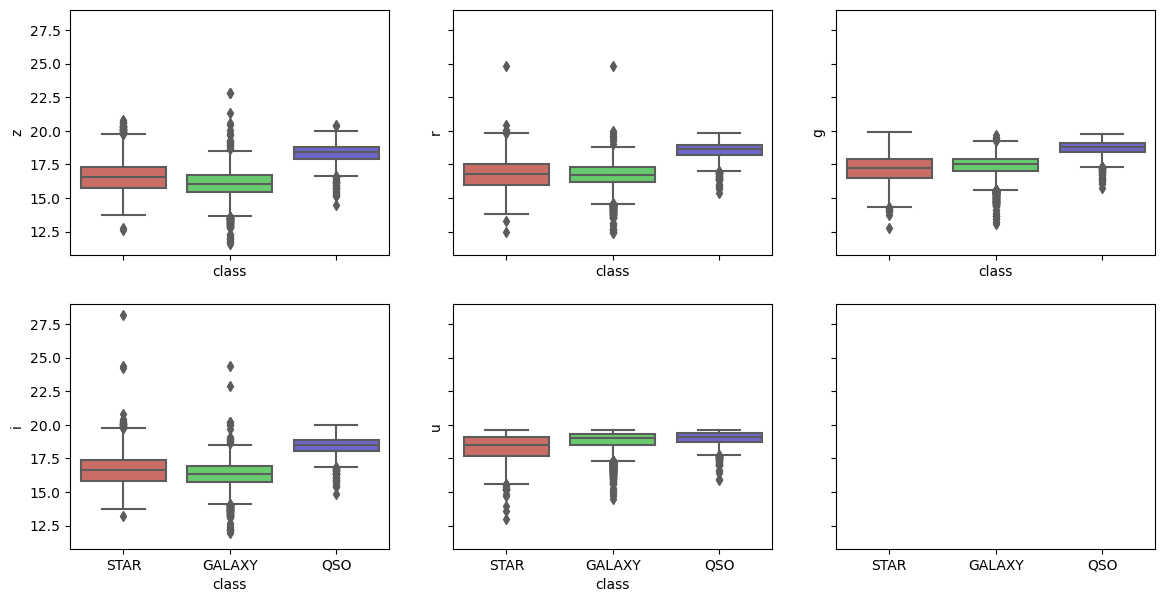

In [7]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

En estos diagramas de cajas para las propiedades de luz, las medias no se encuentran muy alejadas de sus cotas, no así sus valores extremos, por lo que podremos ver si la variabilidad nos ayuda en los procesos de clasificacion

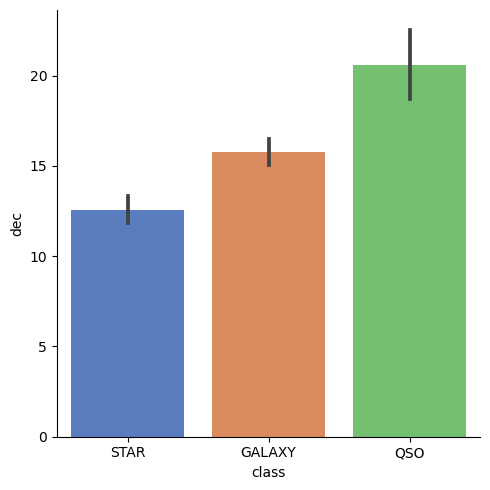

In [8]:
sb.catplot(palette='muted', kind='bar',data=df2_data,x="class", y='dec')

Con los siguientes datos, cuales presentan un grado de relación muy alto entre ellas, indicándonos una tendencia creciente sobre el objeto que se permite ver.

### Transformación de clases a variables numéricas

In [9]:
df2_data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [10]:
df2_class = df2_data[['class']]
df2_full = df2_data.drop(['class'],axis=1)
df2_data = pd.concat([df2_class,df2_full],axis=1)

In [11]:
df2_data.head()

,class,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,STAR,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,STAR,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,GALAXY,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,STAR,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,STAR,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


### Proceso de entrenamiento y clasificación

In [12]:
X = df2_data.iloc[:,1:df2_data.shape[1]].values
y = df2_data.iloc[:,0].values

In [13]:
#Realizando Entrenamiento a 70% de acierto
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)

In [14]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#y genera un vector de predicciones a partir de xtest

#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#permite comparar la test de prediccion con la prediccion real

print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1195   11    2]
 [  23  178    0]
 [   7    2 1082]]
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98      1208
         QSO       0.93      0.89      0.91       201
        STAR       1.00      0.99      0.99      1091

    accuracy                           0.98      2500
   macro avg       0.97      0.96      0.96      2500
weighted avg       0.98      0.98      0.98      2500



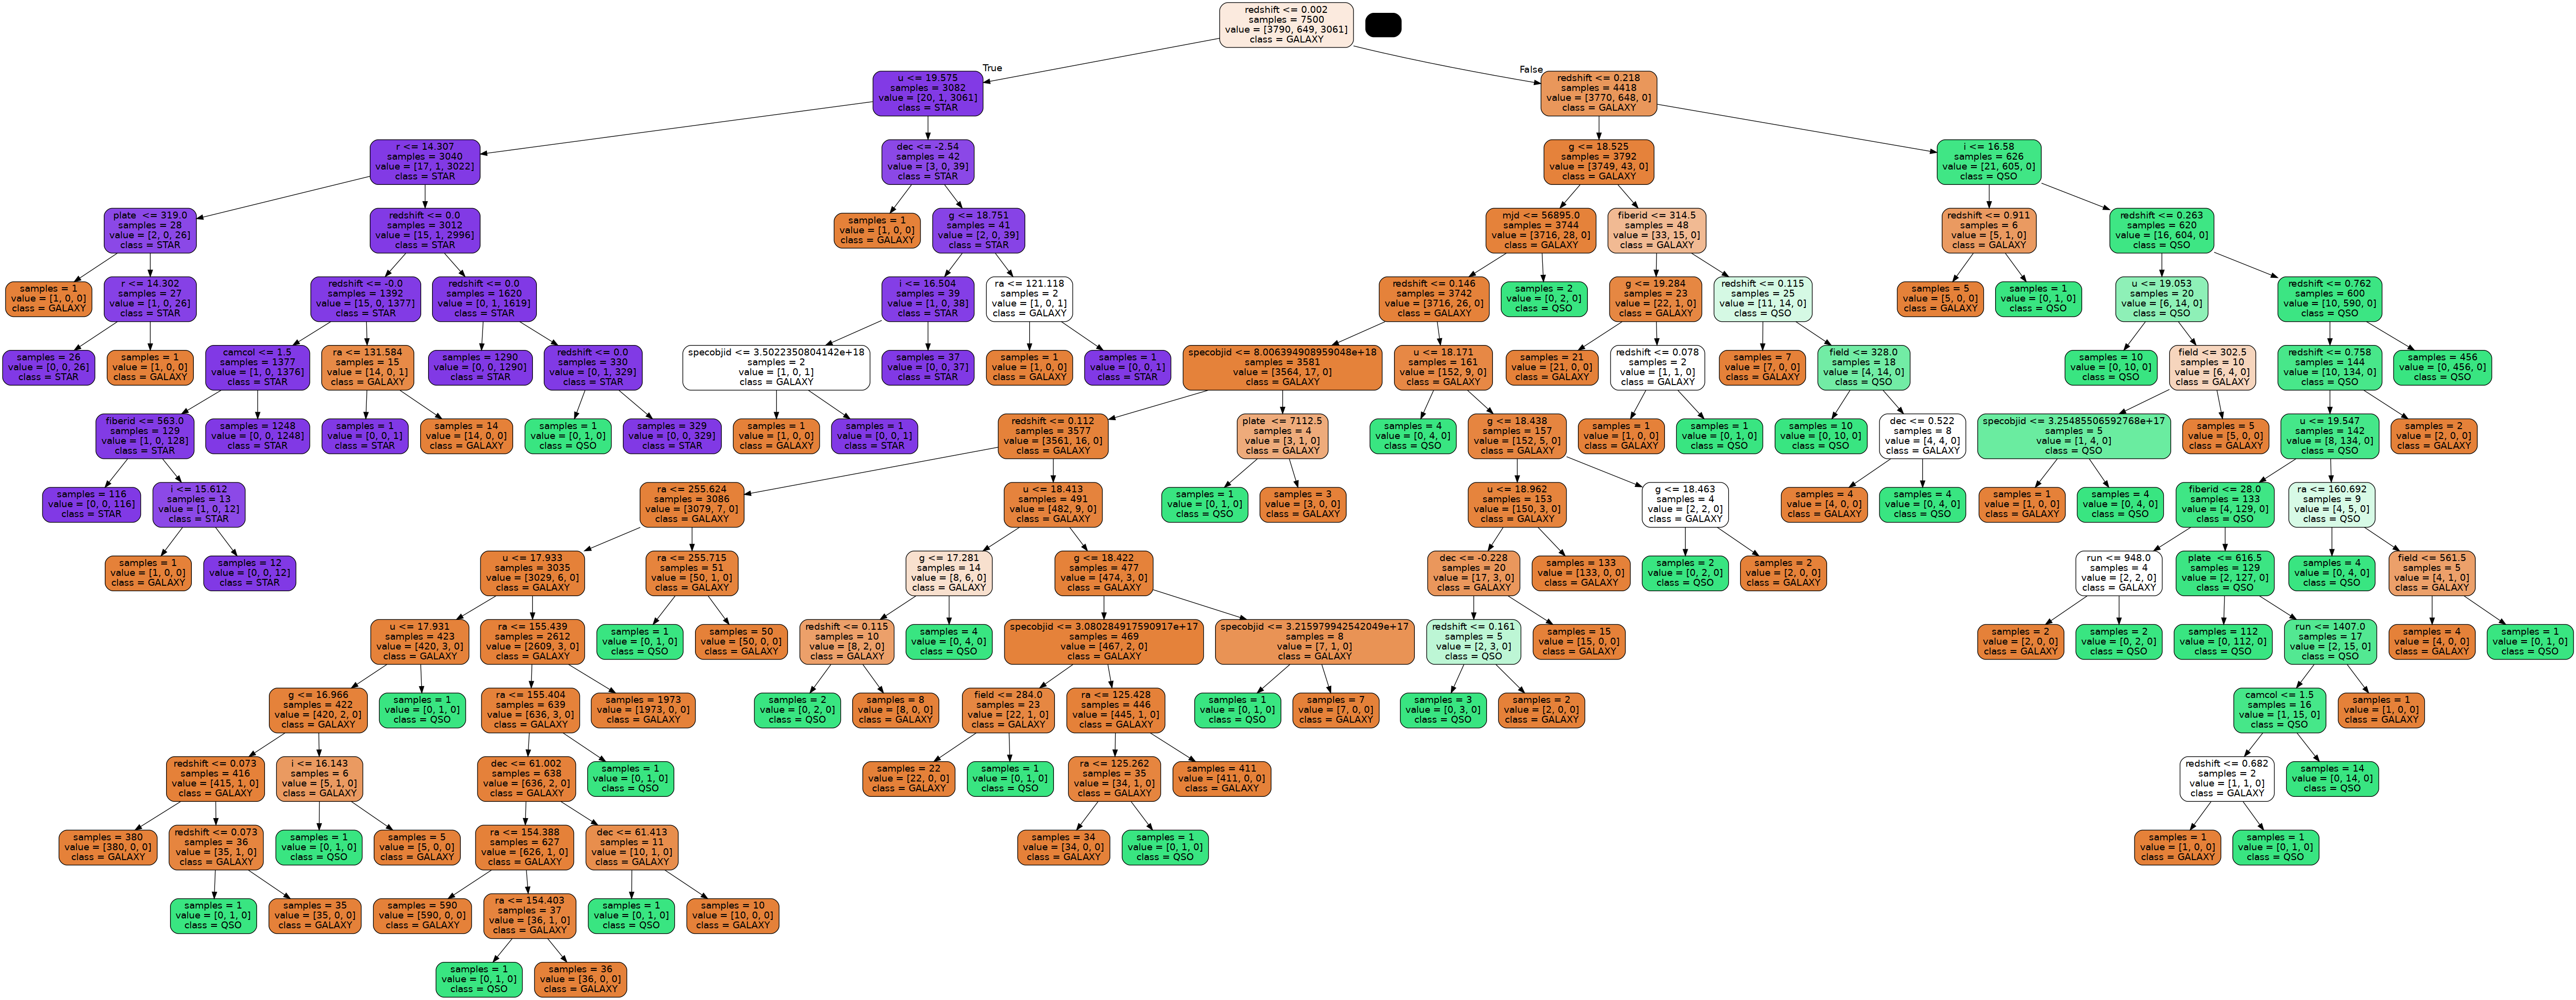

In [15]:
from six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['objid', 'ra', 'dec','u','g','r','i','z', 'run', 
          'camcol', 'field', 'specobjid', 'redshift','plate ', 'mjd', 'fiberid']
classes=['GALAXY','QSO','STAR']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo_GLX.png')
img = Image.open('modelo_GLX.png')
display(img)